# 线性回归房价预测实战

In [2]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


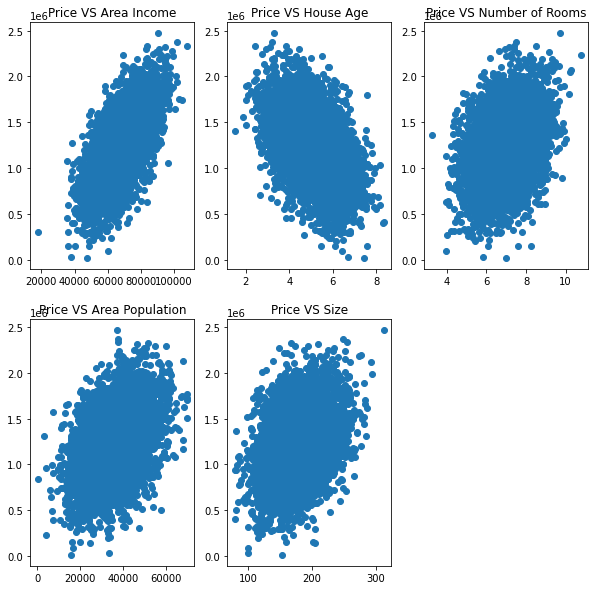

In [21]:
# visualize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[:, 'Avg. Area Income'], data.loc[:, 'Price'])
plt.title('Price VS Area Income')

fig2 = plt.subplot(232)
plt.scatter(data.loc[:, 'Avg. Area House Age'], data.loc[:, 'Price'])
plt.title('Price VS House Age')

fig3 = plt.subplot(233)
plt.scatter(data.loc[:, 'Avg. Area Number of Rooms'], data.loc[:, 'Price'])
plt.title('Price VS Number of Rooms')

fig4 = plt.subplot(234)
plt.scatter(data.loc[:, 'Area Population'], data.loc[:, 'Price'])
plt.title('Price VS Area Population')

fig5 = plt.subplot(235)
plt.scatter(data.loc[:, 'size'], data.loc[:, 'Price'])
plt.title('Price VS Size')

plt.show()

In [25]:
# define X and y
X = np.array(data.loc[:, 'size']).reshape(-1, 1)
y = data.loc[:, 'Price']

In [26]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()
lr_model1.fit(X, y)

LinearRegression()

In [27]:
# predict price by using Price VS Size model
predict_y1 = lr_model1.predict(X)
print(predict_y1)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [28]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
MSE_1 = mean_squared_error(y, predict_y1)
R2_1 = r2_score(y, predict_y1)
print(MSE_1, R2_1)

108771672553.6264 0.1275031240418234


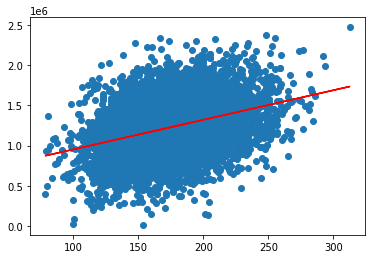

In [29]:
fig6 = plt.figure()
plt.scatter(X, y)
plt.plot(X, predict_y1, 'r')
plt.show()

In [30]:
# define X based on mutiple-facter
X = data.drop(['Price'], axis = 1)
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


In [31]:
# set up second linear model
lr_model2 = LinearRegression()
lr_model2.fit(X, y)

LinearRegression()

In [33]:
predict_y2 = lr_model2.predict(X)
predict_y2

array([1223968.89166086, 1497306.3318863 , 1250884.31019437, ...,
       1020693.92390376, 1260503.36914585, 1302737.7915763 ])

In [34]:
# evaluate the model
MSE_2 = mean_squared_error(y, predict_y2)
R2_2 = r2_score(y, predict_y2)
print(MSE_2, R2_2)

10219846512.17786 0.9180229195220739


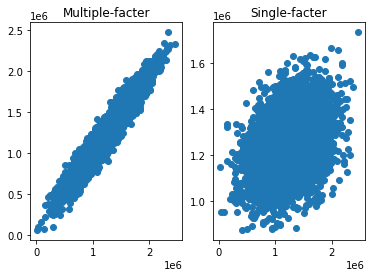

In [40]:
# 单因子模型和多因子模型集中度比较
fig7 = plt.figure()
plt.subplot(121)
plt.scatter(y, predict_y2)
plt.title('Multiple-facter')
plt.subplot(122)
plt.scatter(y, predict_y1)
plt.title('Single-facter')
plt.show()


In [47]:
# make a real predict
x_test = np.array([65000,5,5,30000,200]).reshape(1, -1)
predict_y_test = lr_model2.predict(x_test)
print(predict_y_test)

[817052.19516298]


D:\anaconda3\envs\py_ai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
